In [1]:
library(Signac)
library(Seurat)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [ ]:
# checking donor celltype contribution
# D071
# D339
# D116
# gene/nuc counts/nuc for me comparing those two?

# Emily (Gaulton lab) is looking at this data and we samples drop out 

In [2]:
Sys.time()
sobj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_multiome_md_merge_8/231108_01_merged_multiome_lung8.RDS")
Sys.time()

[1] "2023-12-07 14:08:03 PST"

[1] "2023-12-07 14:10:49 PST"

In [3]:
colnames(sobj@meta.data)

[1] "BARCODE"              "orig.ident"           "nCount_RNA"          
 [4] "nFeature_RNA"         "nCount_ATAC"          "nFeature_ATAC"       
 [7] "fragments_freq_count" "FRiP"                 "percent.mt"          
[10] "nCount_SCT"           "nFeature_SCT"         "INT_ID"              
[13] "NUM.SNPS"             "NUM.READS"            "DROPLET.TYPE"        
[16] "BEST.GUESS"           "BEST.LLK"             "NEXT.GUESS"          
[19] "NEXT.LLK"             "DIFF.LLK.BEST.NEXT"   "BEST.POSTERIOR"      
[22] "SNG.POSTERIOR"        "SNG.BEST.GUESS"       "SNG.BEST.LLK"        
[25] "SNG.NEXT.GUESS"       "SNG.NEXT.LLK"         "SNG.ONLY.POSTERIOR"  
[28] "DBL.BEST.GUESS"       "DBL.BEST.LLK"         "DIFF.LLK.SNG.DBL"    
[31] "nCount_ATAC_comb"     "nFeature_ATAC_comb"

In [5]:
library(repr)
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)


In [6]:
head(sobj@meta.data) #best.guess sng.best.guess

,BARCODE,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,fragments_freq_count,FRiP,percent.mt,nCount_SCT,nFeature_SCT,INT_ID,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,BEST.POSTERIOR,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,nCount_ATAC_comb,nFeature_ATAC_comb
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,QY_2225_2_QY_2224_2,6581,3072,5854,2926,9272,0.6313632,1.1092539,6172,3071,7,1349,1351,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-243.32,"D381_D381,UCSDX51_UCSDX51,0.50",-301.66,58.34,-2.5e+02,1,UCSDX51_UCSDX51,-243.32,D371_D371,-574.97,0,"D381_D381,UCSDX51_UCSDX51,0.50",-301.66,58.34,3588,3295
QY_2225_2_QY_2224_2_AAACAGCCAAAGGTAC-1,AAACAGCCAAAGGTAC-1,QY_2225_2_QY_2224_2,6785,2512,2357,1209,3871,0.6088866,3.3898305,6013,2512,18,672,743,SNG,"D265_D265,D265_D265,0.00",-173.03,"D265_D265,UCSDX3_UCSDX3,0.50",-182.59,9.56,-1.8e+02,1,D265_D265,-173.03,UCSDX3_UCSDX3,-291.65,0,"D265_D265,UCSDX3_UCSDX3,0.50",-182.59,9.56,1408,1327
QY_2225_2_QY_2224_2_AAACAGCCAAATACCT-1,AAACAGCCAAATACCT-1,QY_2225_2_QY_2224_2,773,607,2335,1213,3731,0.6258376,1.1642950,4272,1536,19,378,378,SNG,"UCSDX19_UCSDX19,UCSDX19_UCSDX19,0.00",-68.06,"UCSDX19_UCSDX19,UCSDX31_UCSDX31,0.50",-79.20,11.14,-7.2e+01,1,UCSDX19_UCSDX19,-68.06,UCSDX51_UCSDX51,-145.11,0,"UCSDX19_UCSDX19,UCSDX31_UCSDX31,0.50",-79.20,11.14,1383,1332
QY_2225_2_QY_2224_2_AAACAGCCAATTGACT-1,AAACAGCCAATTGACT-1,QY_2225_2_QY_2224_2,1709,1121,8280,4112,20682,0.4003481,2.5746050,4407,1349,102,1938,1938,SNG,"UCSDX42_UCSDX42,UCSDX42_UCSDX42,0.00",-391.82,"UCSDX40_UCSDX40,UCSDX42_UCSDX42,0.50",-486.25,94.43,-4.0e+02,1,UCSDX42_UCSDX42,-391.82,UCSDX40_UCSDX40,-956.91,0,"UCSDX40_UCSDX40,UCSDX42_UCSDX42,0.50",-486.25,94.43,5443,4916
QY_2225_2_QY_2224_2_AAACAGCCACATAGCC-1,AAACAGCCACATAGCC-1,QY_2225_2_QY_2224_2,5791,2752,84,43,81,1.0370370,0.4144362,5755,2752,132,312,317,SNG,"D339_D339,D339_D339,0.00",-45.57,"D339_D339,D371_D371,0.50",-62.54,16.96,-5.0e+01,1,D339_D339,-45.57,UCSDX2_UCSDX2,-129.87,0,"D339_D339,D371_D371,0.50",-62.54,16.96,47,46
QY_2225_2_QY_2224_2_AAACAGCCACCAGCAT-1,AAACAGCCACCAGCAT-1,QY_2225_2_QY_2224_2,13831,4553,7542,3804,9703,0.7772854,0.6217916,6228,3301,139,1859,1884,DBL,"UCSDX19_UCSDX19,UCSDX44_UCSDX44,0.50",-468.25,"UCSDX44_UCSDX44,UCSDX19_UCSDX19,0.50",-468.25,0.00,5.0e-207,1,UCSDX44_UCSDX44,-625.03,UCSDX19_UCSDX19,-680.52,0,"UCSDX19_UCSDX19,UCSDX44_UCSDX44,0.50",-468.25,-156.78,4544,4212


In [7]:
table(sobj@meta.data$SNG.BEST.GUESS)


      D071_D071       D116_D116       D239_D239       D265_D265       D283_D283 
            273            1590            1222           18123             721 
      D335_D335       D339_D339       D347_D347       D356_D356       D357_D357 
           2680           19885           10735            2527            2394 
      D371_D371       D381_D381 UCSDX13_UCSDX13 UCSDX19_UCSDX19   UCSDX2_UCSDX2 
           1002            1037            5329           12401            3360 
UCSDX21_UCSDX21 UCSDX24_UCSDX24 UCSDX28_UCSDX28   UCSDX3_UCSDX3 UCSDX31_UCSDX31 
            456            1953            6223             900            2473 
UCSDX38_UCSDX38 UCSDX40_UCSDX40 UCSDX42_UCSDX42 UCSDX44_UCSDX44 UCSDX50_UCSDX50 
           8270           10956           13852            9711            3343 
UCSDX51_UCSDX51 UCSDX53_UCSDX53 UCSDX58_UCSDX58   UCSDX7_UCSDX7   UCSDX8_UCSDX8 
           7336            2951             710            7452              82 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



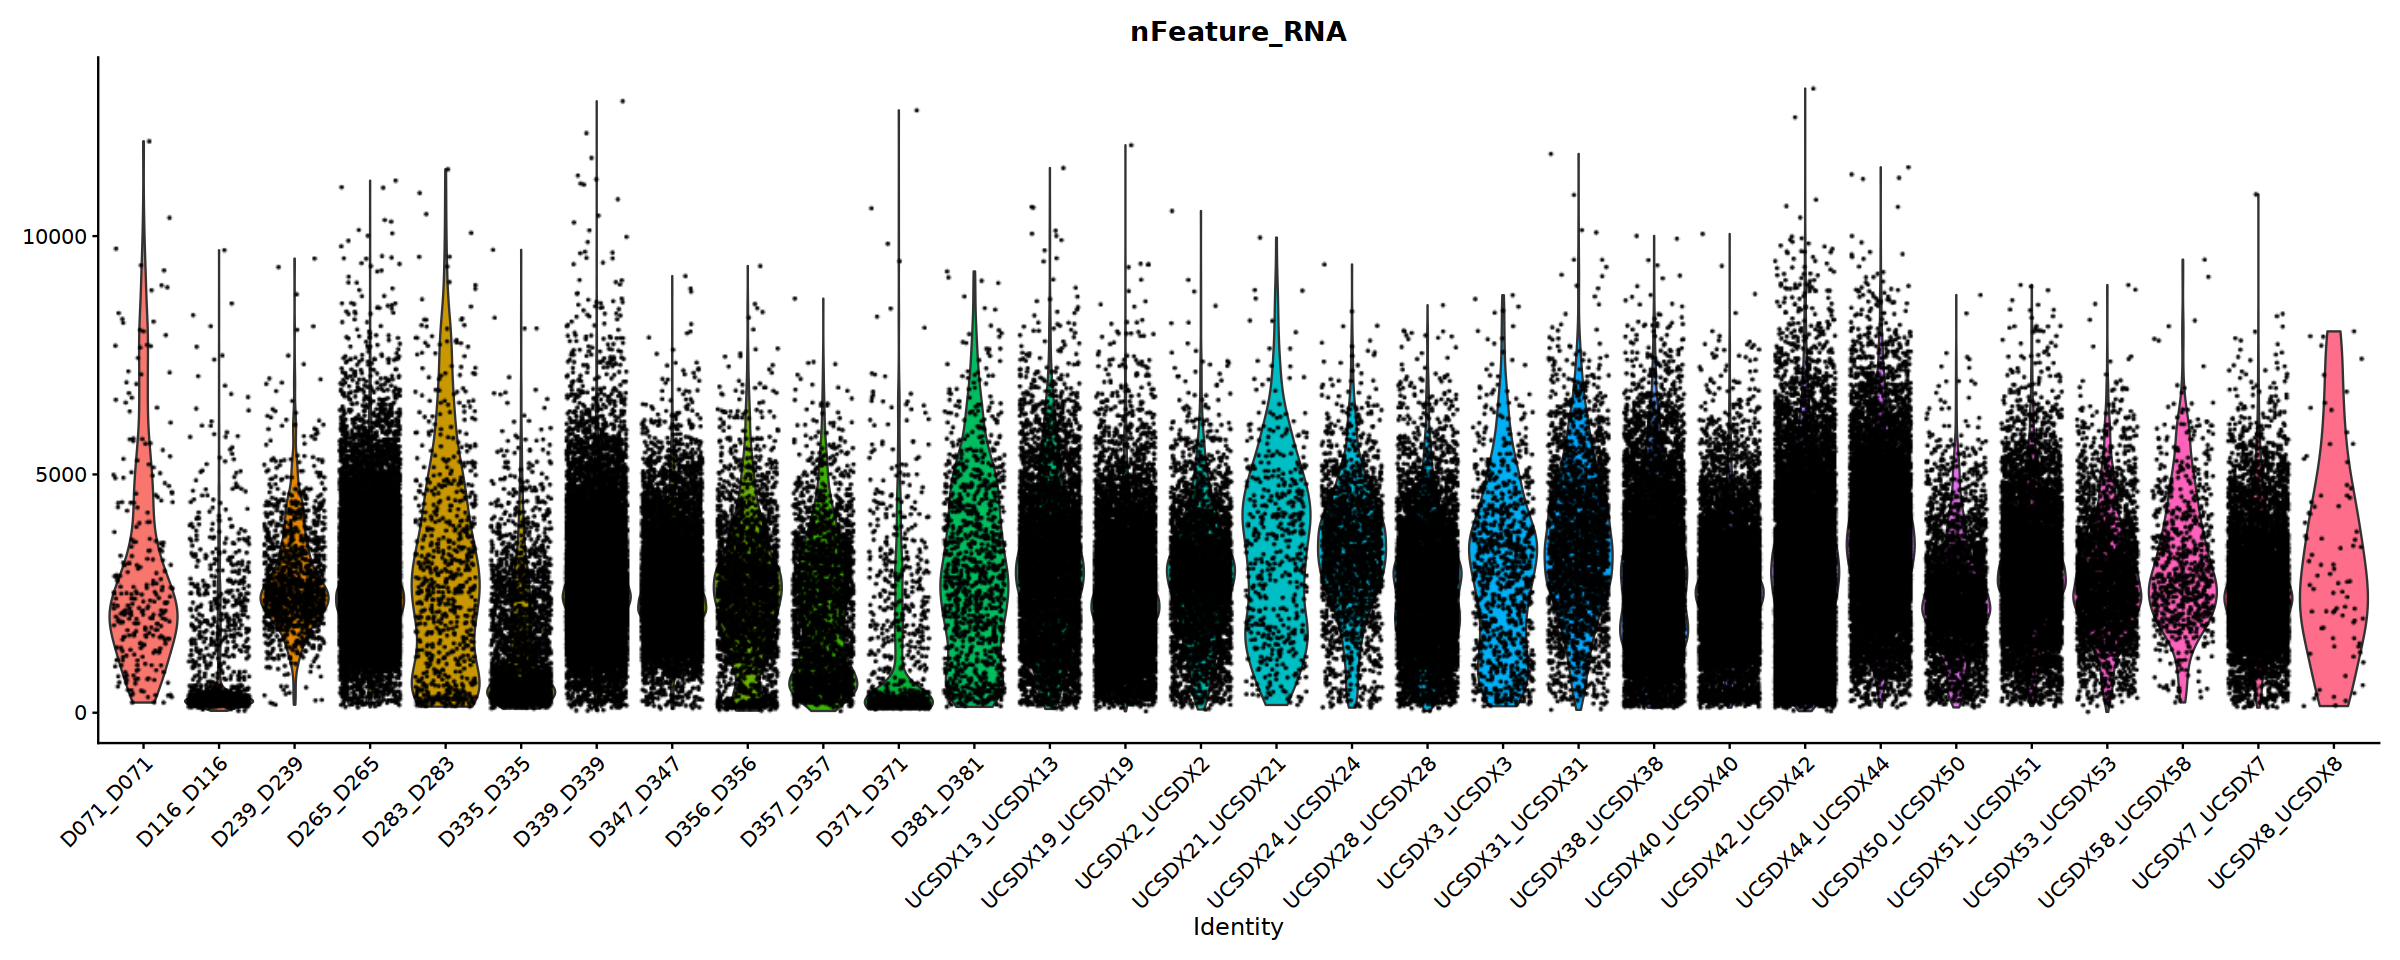

In [13]:
library(repr)
options(repr.plot.width=20, repr.plot.height=8)

VlnPlot(sobj, features = "nFeature_RNA", group.by = "SNG.BEST.GUESS") + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



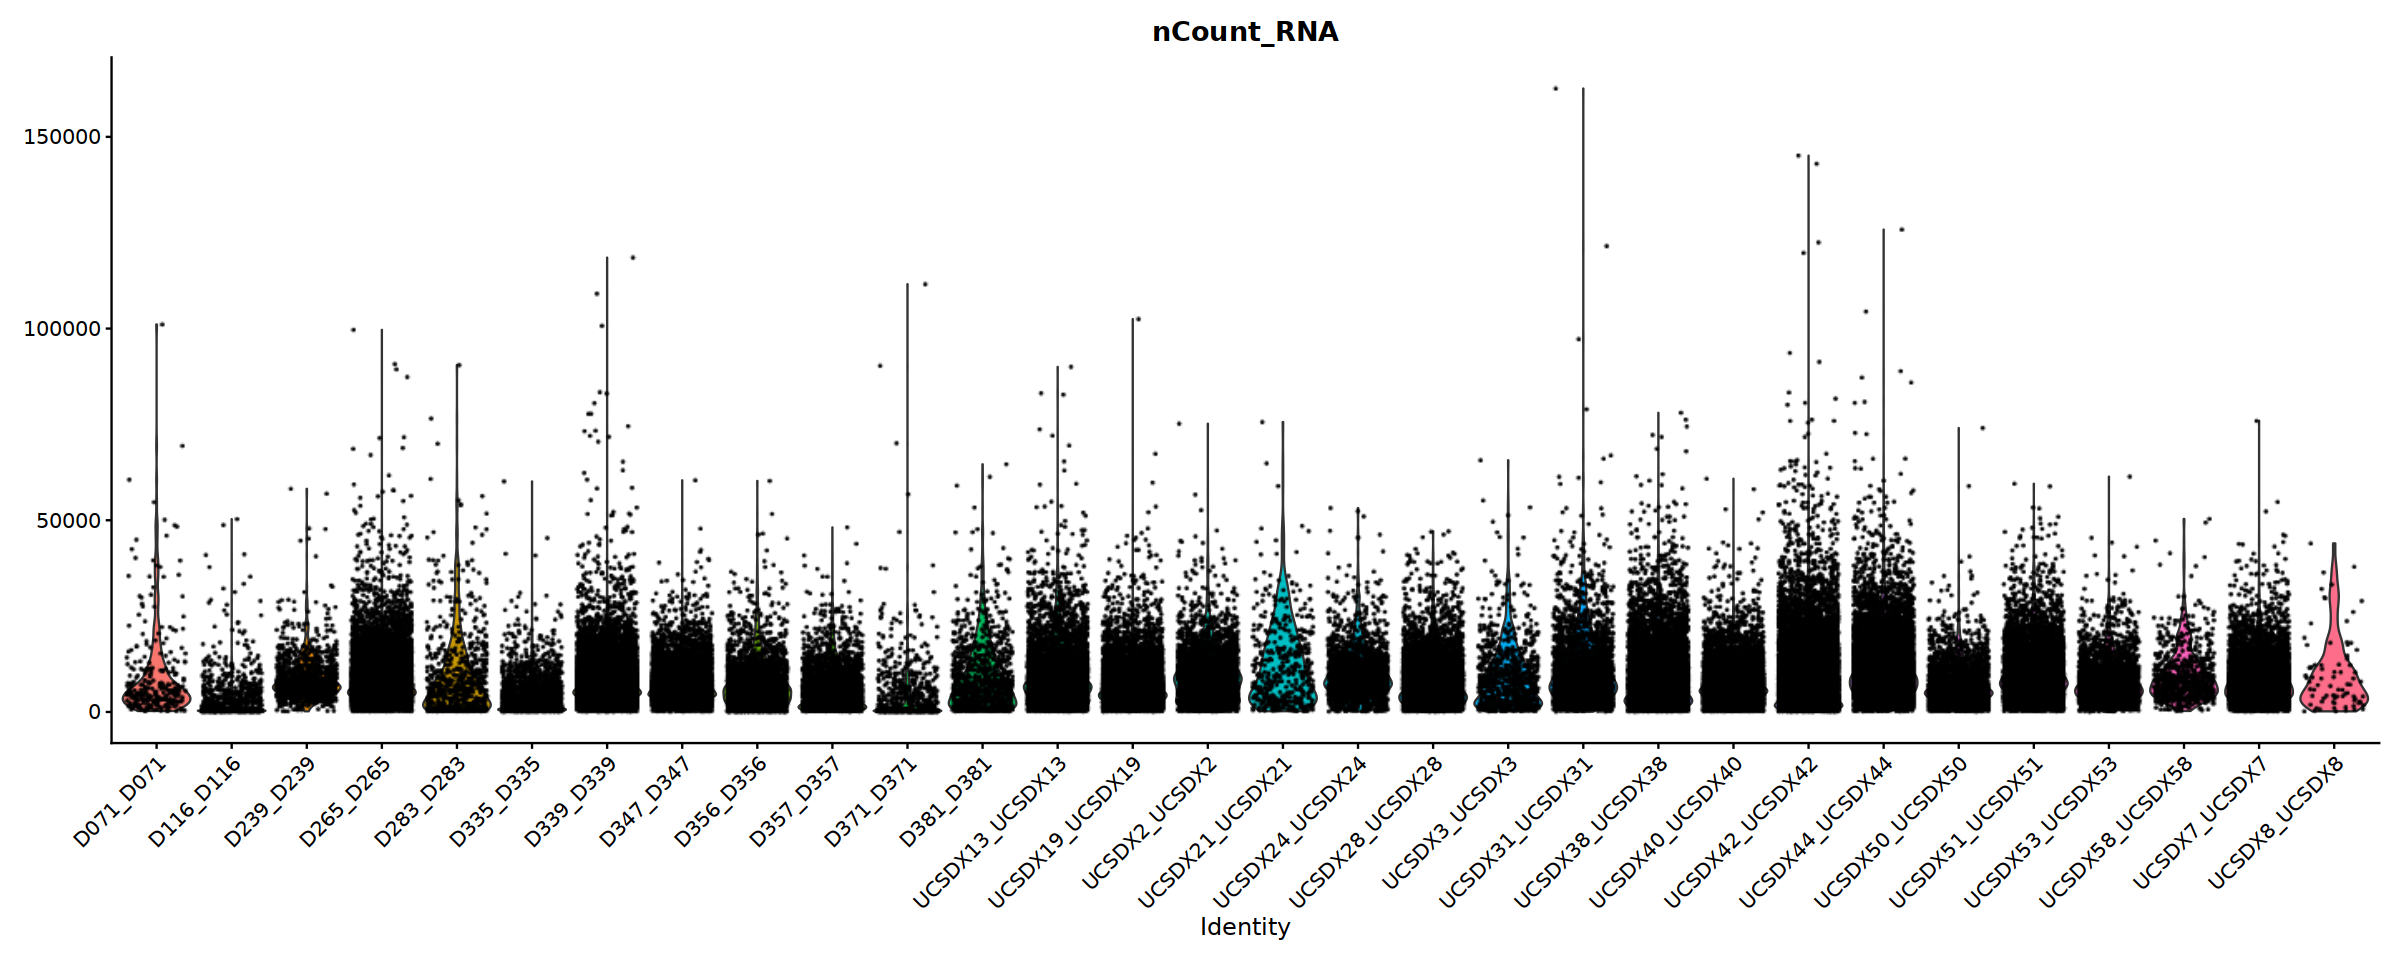

In [15]:
VlnPlot(sobj, features = "nCount_RNA", group.by = "SNG.BEST.GUESS") + NoLegend()